In [2]:
# install.packages("gapminder")

In [6]:
library(gapminder)
library(dplyr)
data(gapminder)
head(gapminder)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Afghanistan,Asia,1952,28.801,8425333,779.4453
Afghanistan,Asia,1957,30.332,9240934,820.8530
Afghanistan,Asia,1962,31.997,10267083,853.1007
Afghanistan,Asia,1967,34.020,11537966,836.1971
Afghanistan,Asia,1972,36.088,13079460,739.9811
Afghanistan,Asia,1977,38.438,14880372,786.1134


In [7]:
filtered <- filter(gapminder, year==1952)

In [8]:
head(filtered)

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Afghanistan,Asia,1952,28.801,8425333,779.4453
Albania,Europe,1952,55.230,1282697,1601.0561
Algeria,Africa,1952,43.077,9279525,2449.0082
Angola,Africa,1952,30.015,4232095,3520.6103
Argentina,Americas,1952,62.485,17876956,5911.3151
Australia,Oceania,1952,69.120,8691212,10039.5956


In [10]:
mean(filtered$lifeExp <=40)

[1] 0.2887324

In [12]:
abs(mean(filtered$lifeExp <=40) - mean(filtered$lifeExp <=60))

[1] 0.4647887

# sapply() on a custom function


In [16]:
x <- filtered$lifeExp %>% unlist

In [17]:
prop = function(q) {
    mean(x<=q)
}

In [18]:
prop(40)

[1] 0.2887324

In [19]:
qs = seq(from=min(x), to=max(x),length=20)

In [20]:
qs

[1] 28.80100 31.10989 33.41879 35.72768 38.03658 40.34547 42.65437 44.96326
 [9] 47.27216 49.58105 51.88995 54.19884 56.50774 58.81663 61.12553 63.43442
[17] 65.74332 68.05221 70.36111 72.67000

In [21]:
props = sapply(qs, prop)

In [22]:
props

[1] 0.007042254 0.028169014 0.063380282 0.105633803 0.204225352 0.288732394
 [7] 0.408450704 0.492957746 0.535211268 0.577464789 0.626760563 0.640845070
[13] 0.683098592 0.718309859 0.774647887 0.809859155 0.852112676 0.922535211
[19] 0.964788732 1.000000000

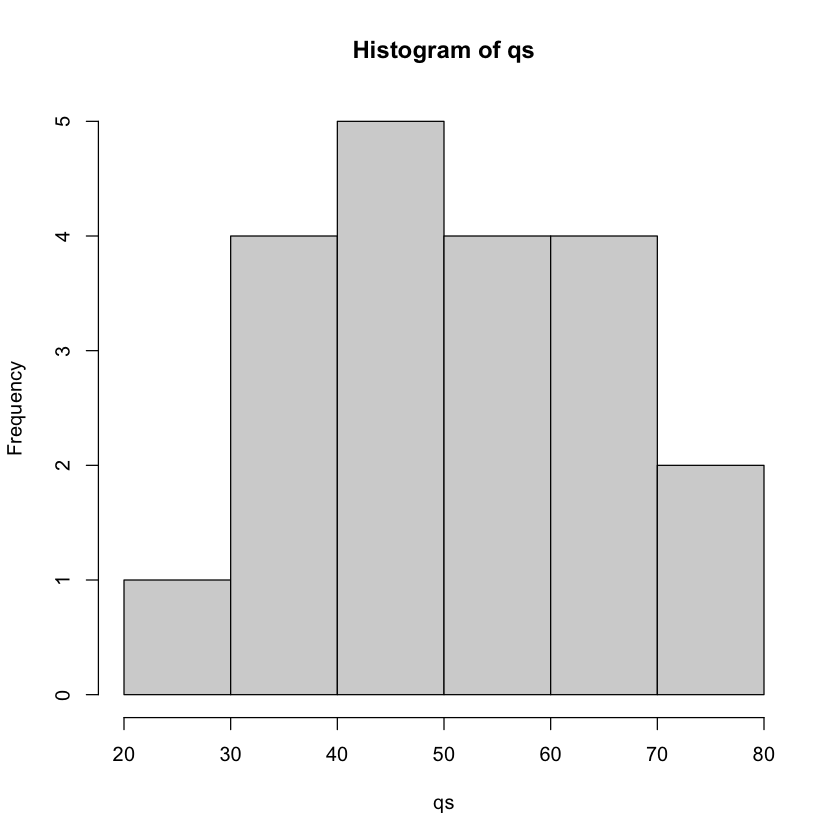

In [23]:
hist(qs)

In [24]:
props = sapply(qs, function(q) mean(x <= q))

In [25]:
props

[1] 0.007042254 0.028169014 0.063380282 0.105633803 0.204225352 0.288732394
 [7] 0.408450704 0.492957746 0.535211268 0.577464789 0.626760563 0.640845070
[13] 0.683098592 0.718309859 0.774647887 0.809859155 0.852112676 0.922535211
[19] 0.964788732 1.000000000

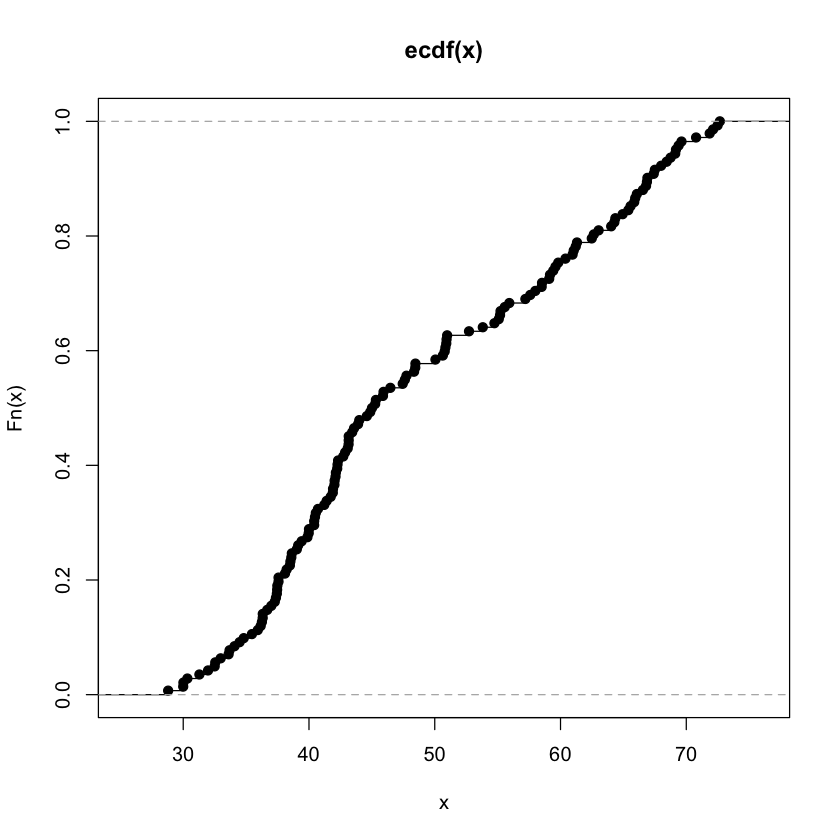

In [26]:
plot(ecdf(x))